#Importing Library

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import string
import time

#Read Data 

In [2]:
%cd
from google.colab import drive
drive.mount('/content/gdrive')

/root
Mounted at /content/gdrive


In [3]:
#f = open('/content/gdrive/MyDrive/DS/en_US.news.txt.txt','r',encoding='utf8')
f = open('/content/gdrive/MyDrive/DS/en_US.blogs.txt','r',encoding='utf8')
#f = open('/content/gdrive/MyDrive/DS/en_US.twitter.txt','r',encoding='utf8')

In [4]:
strAllTexts = f.read()
f.close()



As size of the text file is to large to disply we are Displaying only 3000 string character in the  text file   



In [5]:
print(strAllTexts[0:3000])

In the years thereafter, most of the Oil fields and platforms were named after pagan “gods”.
We love you Mr. Brown.
Chad has been awesome with the kids and holding down the fort while I work later than usual! The kids have been busy together playing Skylander on the XBox together, after Kyan cashed in his $$$ from his piggy bank. He wanted that game so bad and used his gift card from his birthday he has been saving and the money to get it (he never taps into that thing either, that is how we know he wanted it so bad). We made him count all of his money to make sure that he had enough! It was very cute to watch his reaction when he realized he did! He also does a very good job of letting Lola feel like she is playing too, by letting her switch out the characters! She loves it almost as much as him.
so anyways, i am going to share some home decor inspiration that i have been storing in my folder on the puter. i have all these amazing images stored away ready to come to life when we get o

# Exploratory Data Analytics

Length of the text file will give us information about the number of characters present in text file

In [6]:
print("*** Char Count ***")
print(len(strAllTexts))

*** Char Count ***
207723793


In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
print("*** Tokenize Into Lines ***")
lstLines = sent_tokenize(strAllTexts)
print("Done ... ")

*** Tokenize Into Lines ***
Done ... 


Length of sentences in the text file will give us information about the number of sentences present in text file

In [9]:
print("*** Lines Count***")
print(len(lstLines))

*** Lines Count***
2083684


As there are many sentences in text file we will be displaying 10 sentences only

In [10]:
print("*** Fist 10 Lines ***")
print(lstLines[0:10])

*** Fist 10 Lines ***
['In the years thereafter, most of the Oil fields and platforms were named after pagan “gods”.', 'We love you Mr. Brown.', 'Chad has been awesome with the kids and holding down the fort while I work later than usual!', 'The kids have been busy together playing Skylander on the XBox together, after Kyan cashed in his $$$ from his piggy bank.', 'He wanted that game so bad and used his gift card from his birthday he has been saving and the money to get it (he never taps into that thing either, that is how we know he wanted it so bad).', 'We made him count all of his money to make sure that he had enough!', 'It was very cute to watch his reaction when he realized he did!', 'He also does a very good job of letting Lola feel like she is playing too, by letting her switch out the characters!', 'She loves it almost as much as him.', 'so anyways, i am going to share some home decor inspiration that i have been storing in my folder on the puter.']


In [11]:
print("*** File Lines Type ***")
print(type(lstLines))

*** File Lines Type ***
<class 'list'>


Displaying the number characters present in first 1000 sentence

In [12]:
print("*** Chars Per Line ***")
lstCharLength = [len(vline) for vline in lstLines]
print(lstCharLength[0:1000])

*** Chars Per Line ***
[92, 22, 92, 122, 191, 67, 63, 116, 35, 111, 87, 197, 88, 135, 78, 106, 51, 164, 89, 72, 179, 78, 43, 27, 105, 64, 101, 167, 103, 125, 2, 49, 77, 106, 216, 162, 145, 85, 48, 32, 39, 43, 45, 43, 21, 41, 18, 8, 22, 37, 47, 55, 29, 130, 295, 277, 27, 204, 100, 61, 90, 205, 235, 32, 96, 41, 63, 22, 41, 37, 84, 103, 51, 101, 101, 94, 91, 112, 94, 110, 106, 40, 207, 433, 119, 81, 100, 14, 93, 94, 67, 55, 83, 48, 58, 23, 80, 117, 84, 38, 116, 9, 69, 120, 70, 201, 23, 139, 120, 81, 145, 109, 149, 96, 108, 25, 160, 55, 193, 43, 168, 107, 105, 86, 27, 330, 5, 211, 304, 81, 62, 28, 80, 7, 160, 58, 19, 75, 35, 182, 173, 327, 123, 178, 242, 42, 91, 95, 14, 110, 66, 213, 119, 242, 10, 121, 65, 17, 96, 16, 34, 171, 162, 56, 8, 83, 54, 92, 139, 96, 69, 112, 87, 114, 34, 222, 177, 39, 142, 79, 27, 164, 146, 68, 73, 144, 114, 9, 3, 5, 21, 99, 136, 47, 169, 209, 128, 50, 66, 104, 76, 96, 123, 36, 332, 8, 56, 15, 108, 34, 118, 137, 233, 48, 164, 106, 88, 76, 94, 45, 76, 402, 14, 100

Displaying first sentence and the number of characters present in it

In [13]:
print("*** Sample Line & Char Count ***")
print(lstLines[0])
print(lstCharLength[0])

*** Sample Line & Char Count ***
In the years thereafter, most of the Oil fields and platforms were named after pagan “gods”.
92



*** Histogram ***


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


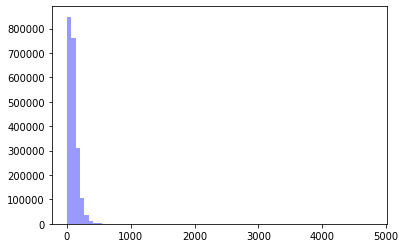

In [14]:
print("\n*** Histogram ***")
plt.figure()
sns.distplot(lstCharLength, bins=70, kde=False, color='b')
plt.show()

# Data Transformation

splitting the text into words using word_tokenizer and storing it in list as data is too large it will take approximately 5 min

In [15]:
print('*** Split Text To Words ***')
lstAllWords = word_tokenize(strAllTexts)
print('Done ...')

*** Split Text To Words ***
Done ...


In [16]:
print('*** Convert To Lower Case ***')
lstAllWords = [t.lower() for t in lstAllWords]
print('Done ...')

*** Convert To Lower Case ***
Done ...


Removing Digites and punctuations present in the list as data is too large it will take approximately 2 min

In [17]:
print('*** Remove Punctuations & Digits ***')
lstAllWords = [t.translate(str.maketrans('','','01234567890')) for t in lstAllWords]
lstAllWords = [t.translate(str.maketrans('','',string.punctuation)) for t in lstAllWords]
print('Done ...')

*** Remove Punctuations & Digits ***
Done ...


In [18]:
print('*** Remove Profane Words ***')
lstProfWords = ["arse","ass","asshole","bastard","bitch","bloody","bollocks","child-fucker","cunt","damn","fuck","goddamn","godsdamn","hell","motherfucker","shit","shitass","whore"]
lstAllWords = [t for t in lstAllWords if t not in lstProfWords]
print('Done ...')

*** Remove Profane Words ***
Done ...


Removing specific words that are not usefull for us

In [19]:
print('*** Remove App Specific Words ***')
lstSpecWords = ['ve','ll',' ','’','—','”','“','rt','nt','via','http','https','mailto']
singleapla="bcdefghjklmnopqrstuvwxyz"
lstSpecWords=lstSpecWords+list(singleapla)
lstAllWords = [t for t in lstAllWords if t not in lstSpecWords]
print('Done ...')

*** Remove App Specific Words ***
Done ...


Removing words with length zero

In [20]:
print('\n*** Remove Short Words ***')
lstAllWords = [t for t in lstAllWords if len(t)>0]
print('Done ...')


*** Remove Short Words ***
Done ...


pre_word creates a dataframe that contains words and the words that comes previous to it.

Display first 10 values in dataframe

In [21]:
def pre_Word(arr):
    dfW=pd.DataFrame()
    l=arr.copy()
    del l[-1]
    dfW["Word"]=l
    l=arr.copy()
    del l[0]
    dfW["Before_Word"]=l
    dfW["Freq"]=0 
    return dfW
dfw=pre_Word(lstAllWords)
print(dfw.head(10))

         Word Before_Word  Freq
0          in         the     0
1         the       years     0
2       years  thereafter     0
3  thereafter        most     0
4        most          of     0
5          of         the     0
6         the         oil     0
7         oil      fields     0
8      fields         and     0
9         and   platforms     0


Create dictionary that contains counter of all words

In [22]:
print('*** Word Freq Count ***')
dctWordCount = Counter(lstAllWords)
print('Done ...')

*** Word Freq Count ***
Done ...


Convert the datadictionary to dataframe

In [23]:
print('*** Convert To Dataframe ***')
dfWordCount  = pd.DataFrame.from_dict(dctWordCount, orient='index').reset_index()
dfWordCount.columns = ['Word','Freq']
print('Done ...')
print(dfWordCount.head(10))

*** Convert To Dataframe ***
Done ...
         Word     Freq
0          in   593980
1         the  1857032
2       years    33067
3  thereafter      218
4        most    39724
5          of   875123
6         oil     5433
7      fields     1112
8         and  1088717
9   platforms      258


In [24]:
print('\n*** Word Freq Count - Sorted ***')
dfWordCount = dfWordCount.sort_values('Freq',ascending=False)
print('Done ...')
print(dfWordCount.head(10))


*** Word Freq Count - Sorted ***
Done ...
    Word     Freq
1    the  1857032
8    and  1088717
60    to  1065873
30     i   901387
89     a   898199
5     of   875123
0     in   593980
50  that   483073
62    it   482596
68    is   437375


# Visual Data Anlytics

Creating and Displaying plot of top 15 highest frequently appear values in dataframe WordCount


*** Plot Word Freq Count - Top 15 ***


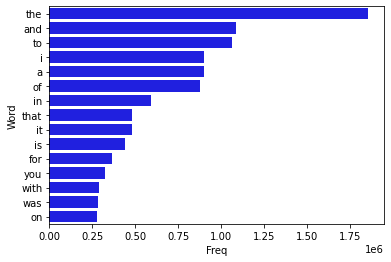

In [25]:
print('\n*** Plot Word Freq Count - Top 15 ***')
G=dfWordCount.head(15)
plt.figure()
sns.barplot(x="Freq", y="Word", data=G, color="b", orient='h')
plt.show()

Creating and Displaying Word Cloud of top 30 highest frequently appear values in dataframe WordCount


*** Plot Word Cloud - Top 30 ***
{'the': 1857032, 'and': 1088717, 'to': 1065873, 'i': 901387, 'a': 898199, 'of': 875123, 'in': 593980, 'that': 483073, 'it': 482596, 'is': 437375, 'for': 363092, 'you': 326377, 'with': 286325, 'was': 284048, 'on': 274142, 'my': 270508, 'this': 258420, 'as': 223466, 'have': 222832, 'be': 208333, 'we': 206840, 'but': 204958, 'are': 196084, 'not': 180536, 'at': 171708, 'so': 164836, 'he': 158756, 'they': 151983, 'from': 148161, 'all': 144191}


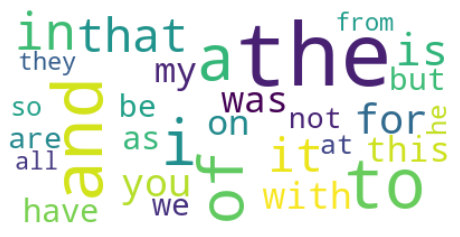

In [26]:
print('\n*** Plot Word Cloud - Top 30 ***')
G=dfWordCount.head(30)
d = {}
for a, x in G.values:
    d[a] = x 
print(d)
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()   

#Text Prediction


*   LastChar() function takes text as input and returns the last char in the text
*   lastword() function takes text as input and returns the last Word in the text
*   predictnextText() function takes a character or a string and number as input and predicticts the completion of the word (Word that user is going to type). It return top number of character with highest frequency based on input number 
*  NextWordPred() function takes a string and number as input and predicticts the next word that the user might type. It return top number of frequent words which came after this word based on data used.


In [27]:
def predictnextText(letter,n):
    df=dfWordCount[dfWordCount["Word"].str.startswith(letter)==True]
    if (len(df) != 0):
      df=df.head(n).reset_index()
      del df['index']
      return df
    else:
      return "No Predicted Words"
      
def LastChar(text):
    s=text
    l=len(s)
    if((" " in s) == True):
        i = s.rindex(" ")
        return str(s[i+1:l])
    else:
        return str(s)

def lastword(text):
    lW = word_tokenize(text)
    return lW[len(lW)-1]

def NextWordPred(g,n):
    df=dfw[dfw["Word"]==g]
    if (len(df) != 0):
      dictW=Counter(df["Before_Word"])
      dfWord=pd.DataFrame.from_dict(dictW, orient='index').reset_index()
      dfWord.columns = ['Word','Freq']
      dfWord= dfWord.sort_values('Freq',ascending=False)
      dfWord= dfWord.head(n).reset_index()
      del dfWord['index']
      return dfWord
    else:
      return "No Predicted Words"

Taking input form user, converting it to lower case.
Then based on that input if user has incomplete word then predicting the completion of the word else predicting next word.

In [30]:
Inp=input(str("Enter Input :-\n"))
N=int(input("Enter the number of words to predict :-"))
if(Inp!=""):
  Inp=Inp.lower()
  if(Inp[len(Inp)-1]!=" "):
      P=LastChar(Inp)
      print(P)
      G=predictnextText(P,N)
      print(G)
  else:
      W=lastword(Inp)
      G=NextWordPred(W,N)
      print(G)

Enter Input :-
banlance is the key to 
Enter the number of words to predict :-9
   Word   Freq
0   the  86224
1    be  68046
2   get  25649
3    do  25538
4  make  21626
5     a  20314
6   see  17920
7  have  17137
8    go  14553


*** Plot Predicted Word Freq Count ***


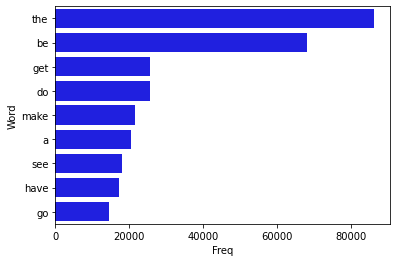

In [31]:
print('*** Plot Predicted Word Freq Count ***')
plt.figure()
sns.barplot(x="Freq", y="Word", data=G, color="b", orient='h')
plt.show()

*** Plot Word Cloud ***
{'the': 86224, 'be': 68046, 'get': 25649, 'do': 25538, 'make': 21626, 'a': 20314, 'see': 17920, 'have': 17137, 'go': 14553}


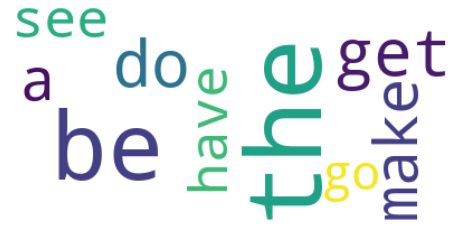

In [32]:
print('*** Plot Word Cloud ***')
d = {}
for a, x in G.values:
    d[a] = x 
print(d)
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()   